In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('data/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


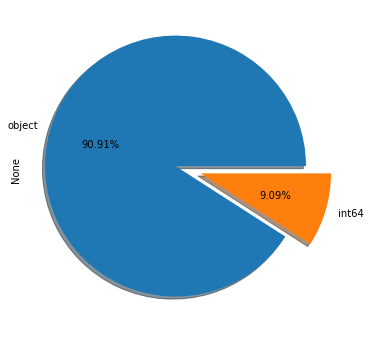

In [4]:
plt.subplots(figsize=(10,6))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1], autopct="%.2f%%", shadow=True)

In [5]:
df['Date'] = df["Date_of_Journey"].str.split('/').str[0].astype(int)
df['Month'] = df["Date_of_Journey"].str.split('/').str[1].astype(int)
df['Year'] = df["Date_of_Journey"].str.split('/').str[2].astype(int)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [8]:
df.drop('Date_of_Journey', axis=1, inplace = True)

In [9]:
 df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [10]:
df["arr_time"] = df["Arrival_Time"].str.split(' ').str[0]

In [11]:
df["Arrival_hour"] = df["arr_time"].str.split(":").str[0].astype(int)
df["Arrival_minute"] = df["arr_time"].str.split(":").str[1].astype(int)

In [12]:
df.drop(["arr_time","Arrival_Time"],axis=1, inplace=True)

In [13]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_hour     10683 non-null  int32 
 13  Arrival_minute   10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [15]:
df["Dep_Time"] = df["Dep_Time"].str.split(' ').str[0]
df["Dep_hour"] = df["Dep_Time"].str.split(":").str[0].astype(int)
df["Dep_minute"] = df["Dep_Time"].str.split(":").str[1].astype(int)

In [16]:
df.drop("Dep_Time",axis=1, inplace=True)

In [17]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20


In [21]:
df['d_hour'] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df['d_min'] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [22]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,d_hour,d_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50


In [23]:
df["d_min"].fillna(0, inplace=True)

In [24]:
df[df["d_hour"]=="5m"]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,d_hour,d_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,0


In [25]:
df.drop(6474,axis=0, inplace=True)

In [26]:
df["d_min"] = df["d_min"].astype(int)
df["d_hour"] = df["d_hour"].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   Month            10682 non-null  int32 
 10  Year             10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_minute   10682 non-null  int32 
 13  Dep_hour         10682 non-null  int32 
 14  Dep_minute       10682 non-null  int32 
 15  d_hour           10682 non-null  int32 
 16  d_min            10682 non-null  int32 
dtypes: int32(9), int64(1), object(7

In [28]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,d_hour,d_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50


In [29]:
df.drop("Duration", axis=1, inplace=True)

In [30]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [31]:
df["Total_Stops"].mode()

0    1 stop
dtype: object

In [32]:
df["Total_Stops"] = df["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1, "3 stops":3, 'nan':1,"4 stops":4})

In [33]:
df["Total_Stops"].isna().sum()

1

In [34]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,d_hour,d_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,1,10,22,20,2,50


In [35]:
df.drop("Route", axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10681 non-null  float64
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  int64  
 6   Date             10682 non-null  int32  
 7   Month            10682 non-null  int32  
 8   Year             10682 non-null  int32  
 9   Arrival_hour     10682 non-null  int32  
 10  Arrival_minute   10682 non-null  int32  
 11  Dep_hour         10682 non-null  int32  
 12  Dep_minute       10682 non-null  int32  
 13  d_hour           10682 non-null  int32  
 14  d_min            10682 non-null  int32  
dtypes: float64(1), int32(9), int64(1), object(4)
memory usage: 959.7+ KB


In [37]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,d_hour,d_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,4,45


In [38]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [40]:
df["Airline"] = df["Airline"].map({"Jet Airways":1,"IndiGo":2,"Air India":3,"Multiple carriers":4, "SpiceJet":5,"Vistara":6,"Air Asia":7,"GoAir":8,"Multiple carriers Premium economy":9,"Jet Airways Business":10,"Vistara Premium economy":11,"Trujet":12})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  int64  
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10681 non-null  float64
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  int64  
 6   Date             10682 non-null  int32  
 7   Month            10682 non-null  int32  
 8   Year             10682 non-null  int32  
 9   Arrival_hour     10682 non-null  int32  
 10  Arrival_minute   10682 non-null  int32  
 11  Dep_hour         10682 non-null  int32  
 12  Dep_minute       10682 non-null  int32  
 13  d_hour           10682 non-null  int32  
 14  d_min            10682 non-null  int32  
dtypes: float64(1), int32(9), int64(2), object(3)
memory usage: 959.7+ KB


In [42]:
df = pd.get_dummies(df,columns=["Source","Destination","Additional_Info"], drop_first=True)

In [43]:
df.head()

,Airline,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2,0.0,3897,24,3,2019,1,10,22,20,...,1,0,0,0,0,0,0,0,1,0
1,3,2.0,7662,1,5,2019,13,15,5,50,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,13882,9,6,2019,4,25,9,25,...,0,0,0,0,0,0,0,0,1,0
3,2,1.0,6218,12,5,2019,23,30,18,5,...,0,0,0,0,0,0,0,0,1,0
4,2,1.0,13302,1,3,2019,21,35,16,50,...,1,0,0,0,0,0,0,0,1,0


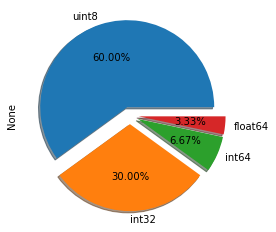

In [44]:
df.dtypes.value_counts().plot.pie(shadow=True, explode=[.1,.1,.1,.1], autopct="%.2f%%")

In [46]:
df.dropna(inplace=True)

In [47]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
model = RandomForestRegressor()

In [62]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
model.score(X_test, y_test)

0.8961623602142073